In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv("sentence_labels_January.csv")
df.head()

,Unnamed: 0,subject,sentence,output
0,0,Trump,How can they let Trump off the hook?,NEGATIVE
1,1,Trump,"On the international stage, we saw President T...",POSITIVE
2,2,Trump,"Now, last year, they feigned horror when Trump...",NEGATIVE
3,3,Trump,Trump is it in 2020 unless what?,NEUTRAL
4,4,Comey,Then there is the question of how many memos C...,NEUTRAL


In [50]:
#df = df.replace(['NEGATIVE','NEUTRAL','POSITIVE'],[-1,0,1])
df = df.replace(['NEGATIVE','POSITIVE'],[-1,1])
df.output = pd.to_numeric(df.output, errors='coerce')
df = df.dropna()

In [51]:
gdf = df.groupby("subject").agg({'sentence':'count','output' : 'mean'}).sort_values('sentence', ascending=False)
gdf.head()

,sentence,output
subject,,
Trump,111,-0.585586
Democrats,97,-0.896907
Adam Schiff,44,-0.545455
Iran,42,-0.904762
House,20,-1.000000


<BarContainer object of 10 artists>

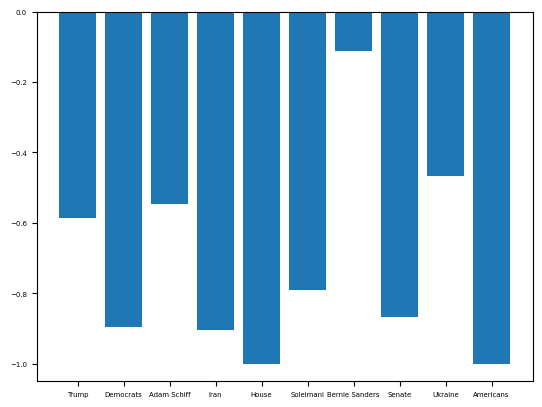

In [53]:
plt.rcParams['font.size'] = 5
pltdf = gdf
plt.bar(pltdf.index[0:10], pltdf.output[0:10])

<BarContainer object of 6 artists>

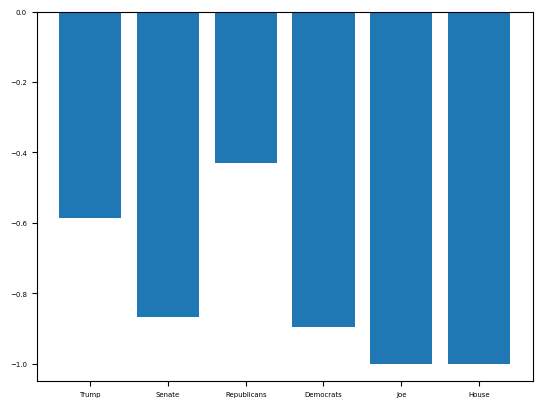

In [52]:
plt.rcParams['font.size'] = 5
pltdf = gdf.loc[['Trump','Senate','Republicans','Democrats','Joe','House'],:]
plt.bar(pltdf.index, pltdf.output)